## 1. Swedish demographic data (*)

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi).

a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [46]:
import pandas as pd

befolkningsstatistik = pd.read_html(
    "https://sv.wikipedia.org/wiki/Sveriges_demografi",
    match="Naturlig befolkningsförändring",
    decimal=",",
)[0]

befolkningsstatistik.rename(columns={"Unnamed: 0": "År"}, inplace=True)

befolkningsstatistik


,År,Medel- folkmängd,Födda,Döda,Naturlig befolkningsförändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolkningsförändring (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270,168,102,402.0
1,1901,5 156 000,139 370,82 772,56 598,270,161,110,404.0
2,1902,5 187 000,137 364,79 722,57 642,265,154,111,395.0
3,1903,5 210 000,133 896,78 610,55 286,257,151,106,382.0
4,1904,5 241 000,134 952,80 152,54 800,257,153,105,383.0
...,...,...,...,...,...,...,...,...,...
117,2017,"10 057 697,5",115 416,91 972,23 444,114,91,23,179.0
118,2018,"10 175 213,5",115 832,92 185,23 647,113,90,23,175.0
119,2019,"10 278 887,0",114 523,88 766,28 727,111,87,24,170.0
120,2020,"10 353 442,0",113 077,98 124,14 953,109,95,14,166.0


------
&nbsp; b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.


In [23]:
befolkningsstatistik.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       122 non-null    int64  
 1   Medel- folkmängd                           122 non-null    object 
 2   Födda                                      122 non-null    object 
 3   Döda                                       122 non-null    object 
 4   Naturlig befolkningsförändring             122 non-null    object 
 5   Nativitet (per 1000)                       122 non-null    int64  
 6   Dödstal (per 1000)                         122 non-null    int64  
 7   Naturlig befolkningsförändring (per 1000)  122 non-null    int64  
 8   Total fertilitet                           121 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 8.7+ KB


In [11]:
befolkningsstatistik.describe()


,Year,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolkningsförändring (per 1000),Total fertilitet
count,122.000000,122.000000,122.000000,122.000000,121.000000
mean,1960.500000,156.721311,112.762295,43.877049,225.388430
std,35.362409,46.414101,18.331679,33.625202,65.906673
min,1900.000000,100.000000,87.000000,-7.000000,150.000000
25%,1930.250000,118.250000,100.000000,22.000000,179.000000
50%,1960.500000,143.500000,108.000000,34.500000,200.000000
75%,1990.750000,180.000000,117.750000,63.500000,243.000000
max,2021.000000,270.000000,180.000000,119.000000,404.000000


<AxesSubplot: xlabel='Year', ylabel='Medel- folkmängd'>

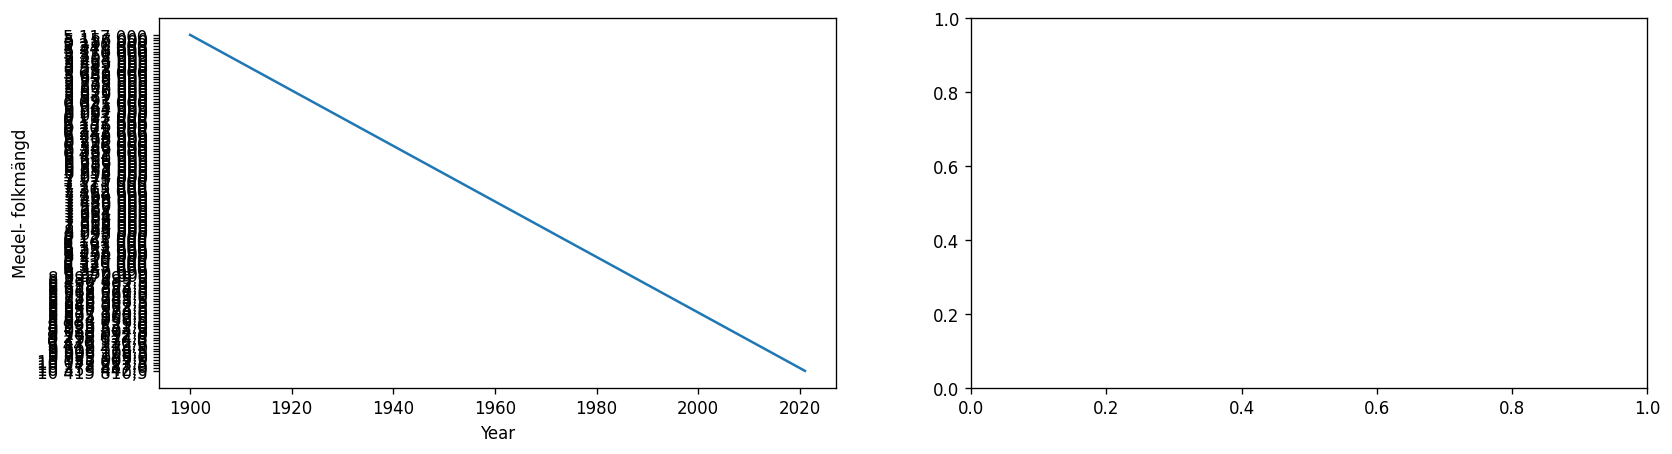

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 4), dpi=120)

sns.lineplot(data=befolkningsstatistik, x="Year", y="Medel- folkmängd", ax=ax[0])


&nbsp; c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |

In [67]:
df_history = pd.read_html(
    "https://sv.wikipedia.org/wiki/Sveriges_demografi",
    match="Vid utgången av år",
    header=1,
    decimal= ","

)[0]
df_history

df_history.drop(["Totalt", "Promille"], axis= "columns", inplace= True)
df_history.drop([7, 8, 9, 10], axis= "rows", inplace= True)
df_history.rename(columns={"Vid utgången av år": "År"}, inplace= True)
df_history


,År,Folkmängd
0,1570,900 000
1,1650,1 225 000
2,1700,1 485 000
3,1720,1 350 000
4,1755,1 878 000
5,1815,2 465 000
6,1865,4 099 000


&nbsp; d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 

In [68]:
befolkningsstatistik.rename(columns={"Medel- folkmängd": "Folkmängd"}, inplace=True)

df_pop = pd.concat(
    [df_history[["År", "Folkmängd"]], befolkningsstatistik[["År", "Folkmängd"]]], axis=0
)


In [81]:
df_pop.head(20)


,År,Folkmängd
0,1570,900 000
1,1650,1 225 000
2,1700,1 485 000
3,1720,1 350 000
4,1755,1 878 000
5,1815,2 465 000
6,1865,4 099 000
0,1900,5 117 000
1,1901,5 156 000
2,1902,5 187 000


&nbsp; e) Draw a graph of population data from 1570-2020.

In [119]:
import plotly_express as px

fig = px.line(df_pop, x="År", y="Folkmängd")
fig.show()

&nbsp; f) Try to see if you can plot something from this data that might show the effects of the Covid-19 pandemic. It's good to zoom in the data, i.e. plot a shorter time frame instead of all time frames. 


In [82]:
befolkningsstatistik

,År,Folkmängd,Födda,Döda,Naturlig befolkningsförändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolkningsförändring (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270,168,102,402.0
1,1901,5 156 000,139 370,82 772,56 598,270,161,110,404.0
2,1902,5 187 000,137 364,79 722,57 642,265,154,111,395.0
3,1903,5 210 000,133 896,78 610,55 286,257,151,106,382.0
4,1904,5 241 000,134 952,80 152,54 800,257,153,105,383.0
...,...,...,...,...,...,...,...,...,...
117,2017,"10 057 697,5",115 416,91 972,23 444,114,91,23,179.0
118,2018,"10 175 213,5",115 832,92 185,23 647,113,90,23,175.0
119,2019,"10 278 887,0",114 523,88 766,28 727,111,87,24,170.0
120,2020,"10 353 442,0",113 077,98 124,14 953,109,95,14,166.0


In [88]:
df_covid = befolkningsstatistik.tail(3)

fig = px.bar(
    df_covid,
    x="År",
    y="Naturlig befolkningsförändring (per 1000)",
    color="Naturlig befolkningsförändring",
)

fig.show()


&nbsp; g) Try to see if you can plot something from this data that might capture the effects imigration and emigration waves.

In [89]:
befolkningsstatistik

,År,Folkmängd,Födda,Döda,Naturlig befolkningsförändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolkningsförändring (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270,168,102,402.0
1,1901,5 156 000,139 370,82 772,56 598,270,161,110,404.0
2,1902,5 187 000,137 364,79 722,57 642,265,154,111,395.0
3,1903,5 210 000,133 896,78 610,55 286,257,151,106,382.0
4,1904,5 241 000,134 952,80 152,54 800,257,153,105,383.0
...,...,...,...,...,...,...,...,...,...
117,2017,"10 057 697,5",115 416,91 972,23 444,114,91,23,179.0
118,2018,"10 175 213,5",115 832,92 185,23 647,113,90,23,175.0
119,2019,"10 278 887,0",114 523,88 766,28 727,111,87,24,170.0
120,2020,"10 353 442,0",113 077,98 124,14 953,109,95,14,166.0


In [111]:
fig = px.bar(befolkningsstatistik, x="År", y="Naturlig befolkningsförändring (per 1000)", color="Nativitet (per 1000)")
fig.show()

&nbsp; h) Feel free to find other interesting facts about the Swedish demographics based on this data. 